**Table of contents**<a id='toc0_'></a>    
- [Getting Started](#toc1_)    
- [Setting up the environment](#toc2_)    
- [Listing datasets](#toc3_)    
- [Get information about datasets](#toc4_)    
- [Verify the dataset exists or not](#toc5_)    
- [Create dataset](#toc6_)    
- [Create Labels for dataset](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Getting Started](#toc0_)

In [ ]:
gcloud auth login

In [ ]:
gcloud config set project burner-yasshaik1

# <a id='toc2_'></a>[Setting up the environment](#toc0_)

In [ ]:
# Step 1: Ensure you have virtualenv installed to install any GCP Package
pip install virtualenv

# Step 2: Create a virtual environment (replace 'myenv' with your desired environment name)
virtualenv myenv

# Step 3: Activate the virtual environment
# On Windows
myenv\Scripts\activate
# On macOS/Linux
source myenv/bin/activate

# Step 4: Upgrade pip (optional but recommended)
pip install --upgrade pip

# Step 5: Install the Google Cloud Pub/Sub package
pip install google-cloud-bigquery

# <a id='toc3_'></a>[Listing datasets](#toc0_)

In [ ]:
from google.cloud import bigquery

# Construct a BigQuery client object.
client = bigquery.Client()

datasets = list(client.list_datasets())  # Make an API request.
project = client.project

i=1

if datasets:
    print("Datasets in project {}:".format(project))
    for dataset in datasets:
        print("Dataset{} : {}".format(i,dataset.dataset_id))
        i = i +1
else:
    print("{} project does not contain any datasets.".format(project))

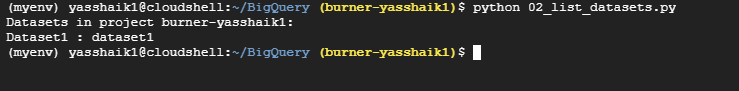

# <a id='toc4_'></a>[Get information about datasets](#toc0_)

In [ ]:
from google.cloud import bigquery

# Construct a BigQuery client object.
client = bigquery.Client()

# Set dataset_id to the ID of the dataset to fetch.
dataset_id = 'burner-yasshaik1.dataset_sample"

dataset = client.get_dataset(dataset_id)  # Make an API request.

full_dataset_id = "{}.{}".format(dataset.project, dataset.dataset_id)

friendly_name = dataset.friendly_name
print(
    "Got dataset '{}' with friendly_name '{}'.".format(
        full_dataset_id, friendly_name
    )
)

# View dataset properties.
print("Description: {}".format(dataset.description))


print("Labels:")
labels = dataset.labels
if labels:
    for label, value in labels.items():
        print("\t{}: {}".format(label, value))
else:
    print("\tDataset has no labels defined.")

# View tables in dataset.
print("Tables:")
tables = list(client.list_tables(dataset))  # Make an API request(s).
if tables:
    for table in tables:
        print("\t{}".format(table.table_id))
else:
    print("\tThis dataset does not contain any tables.")

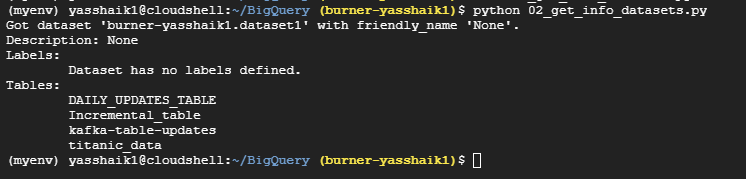

# <a id='toc5_'></a>[Verify the dataset exists or not](#toc0_)

In [ ]:
from google.cloud import bigquery
from google.cloud.exceptions import NotFound

client = bigquery.Client()

# Set dataset_id to the ID of the dataset to determine existence.
dataset_id = 'burner-yasshaik1.dataset1'

try:
    client.get_dataset(dataset_id)  # Make an API request.
    print("Dataset {} already exists".format(dataset_id))
except NotFound:
    print("Dataset {} is not found".format(dataset_id))

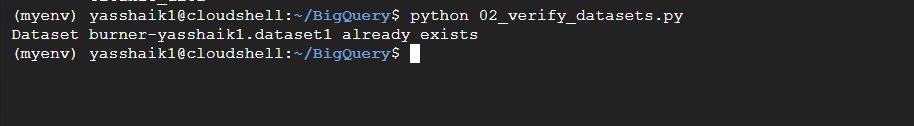
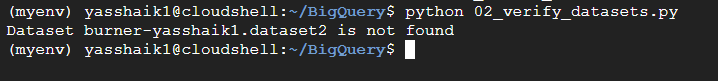

# <a id='toc6_'></a>[Create dataset](#toc0_)

In [ ]:
from google.cloud import bigquery

client = bigquery.Client()

dataset_id = 'burner-yasshaik1.dataset_sample'

dataset = bigquery.Dataset(dataset_id)
dataset.location = "us-central1"

dataset = client.create_dataset(dataset)  
print("Created dataset {}.{}".format(client.project, dataset.dataset_id))

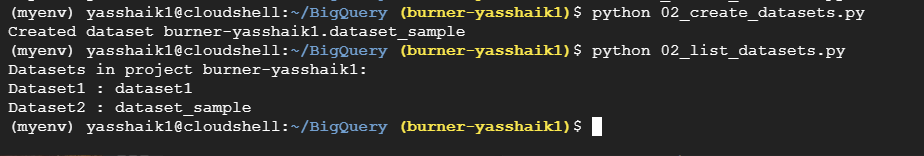

# <a id='toc7_'></a>[Create Labels for dataset](#toc0_)

In [ ]:
from google.cloud import bigquery

client = bigquery.Client()

dataset_id = 'burner-yasshaik1.dataset_sample'

dataset = client.get_dataset(dataset_id)  
dataset.labels = {"example": "update_datset"}

dataset = client.update_dataset(dataset, ["labels"])  
print("Labels added to {}".format(dataset_id))

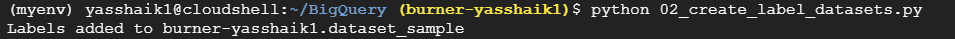

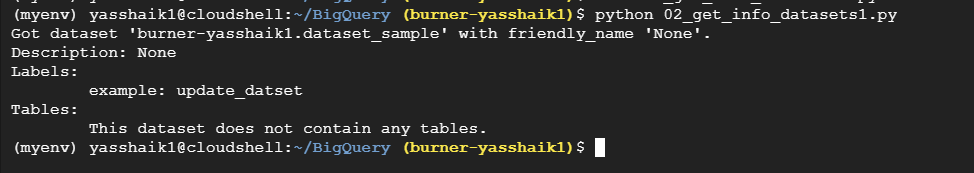

# Create table

In [ ]:
from google.cloud import bigquery

client = bigquery.Client()

dataset_id = 'burner-yasshaik1.dataset_sample'

table_id = 'burner-yasshaik1.dataset_sample.sample_table'

schema=[
    bigquery.SchemaField("name", "STRING"),
    bigquery.SchemaField("gender", "STRING"),
    bigquery.SchemaField("count", "INTEGER")
]

table = bigquery.Table(table_id, schema=schema)
table = client.create_table(table)  # Make an API request.
print(
    "Created table {}.{}.{}".format(table.project, table.dataset_id, table.table_id)
)


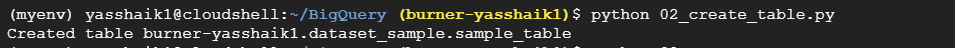

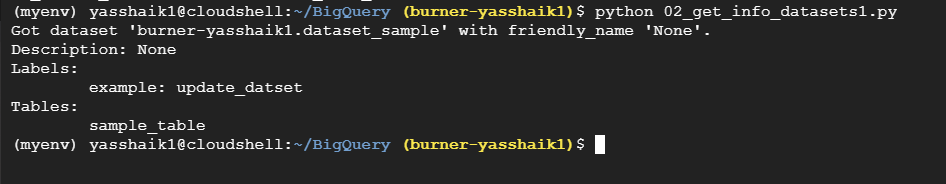

# Delete Dataset

In [ ]:
from google.cloud import bigquery

client = bigquery.Client()

dataset_id = 'burner-yasshaik1.dataset_sample'

client.delete_dataset(
    dataset_id, delete_contents=True, not_found_ok=True
)  

print("Deleted dataset '{}'.".format(dataset_id))

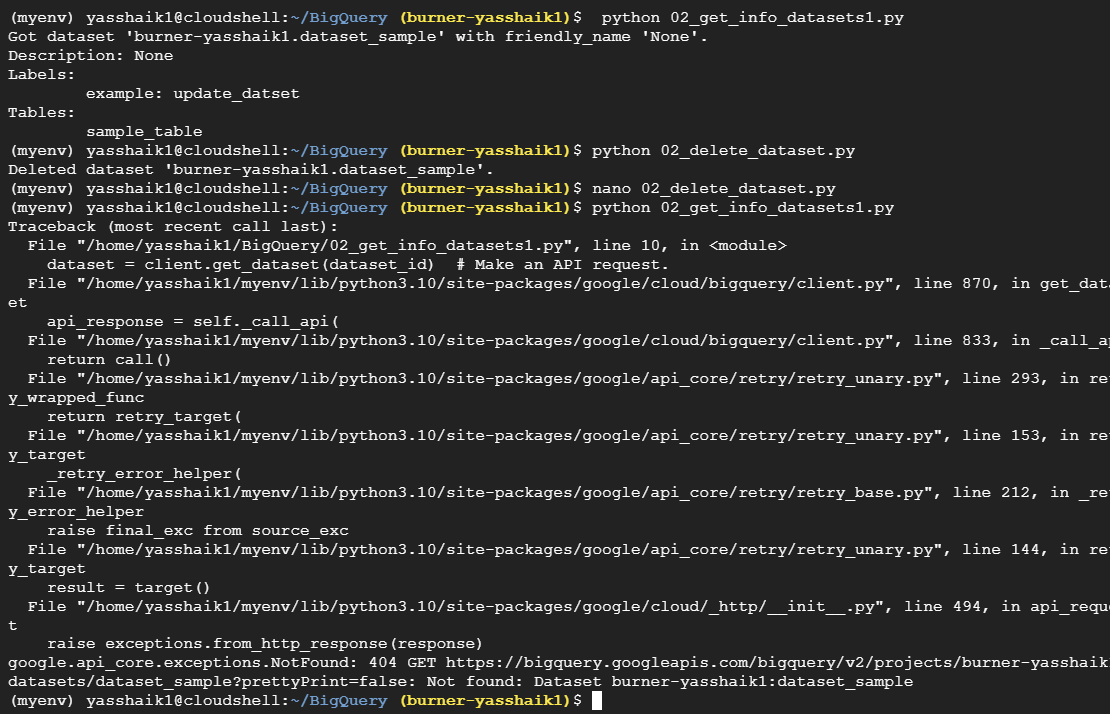